In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import SGD

In [2]:
veri = pd.read_csv("WB.csv") 
print(veri.head())

         Date      Value
0  2018-12-31  87.223000
1  2017-12-31  87.001003
2  2016-12-31  86.772999
3  2015-12-31  86.264999
4  2014-12-31  85.792000


In [3]:
x = veri["Date"].values.reshape(-1,1)
y = veri["Value"].values.reshape(-1,1)
y = np.ravel(y)
print(x.shape, y.shape)

(28, 1) (28,)


In [4]:
le = LabelEncoder()
x = le.fit_transform(x)
x = x.reshape(-1,1)

C:\Users\yalim\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
print(x.shape)
print(x)


(28, 1)
[[27]
 [26]
 [25]
 [24]
 [23]
 [22]
 [21]
 [20]
 [19]
 [18]
 [17]
 [16]
 [15]
 [14]
 [13]
 [12]
 [11]
 [10]
 [ 9]
 [ 8]
 [ 7]
 [ 6]
 [ 5]
 [ 4]
 [ 3]
 [ 2]
 [ 1]
 [ 0]]


In [35]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [36]:
y_pred = lr.predict(x)
print("Başlangıç: ", lr.intercept_)
y_pred_lr = lr.predict([[29]])
print(y_pred_lr)

Başlangıç:  83.34249538741088
[85.98503443]


In [37]:
pf = PolynomialFeatures(degree=2)
x2 = pf.fit_transform(x)

lr.fit(x2, y)
y_log = lr.predict(x2)
print(x2)

[[  1.  27. 729.]
 [  1.  26. 676.]
 [  1.  25. 625.]
 [  1.  24. 576.]
 [  1.  23. 529.]
 [  1.  22. 484.]
 [  1.  21. 441.]
 [  1.  20. 400.]
 [  1.  19. 361.]
 [  1.  18. 324.]
 [  1.  17. 289.]
 [  1.  16. 256.]
 [  1.  15. 225.]
 [  1.  14. 196.]
 [  1.  13. 169.]
 [  1.  12. 144.]
 [  1.  11. 121.]
 [  1.  10. 100.]
 [  1.   9.  81.]
 [  1.   8.  64.]
 [  1.   7.  49.]
 [  1.   6.  36.]
 [  1.   5.  25.]
 [  1.   4.  16.]
 [  1.   3.   9.]
 [  1.   2.   4.]
 [  1.   1.   1.]
 [  1.   0.   0.]]


In [38]:
y_pred_pr = lr.predict([[1,29,841]])

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)

In [40]:
model = Sequential()
model.add(Dense(32, kernel_initializer="glorot_uniform", activation="relu"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(30, activation="relu"))
model.add(Dense(1))

In [41]:
model.compile( optimizer=Adam(),loss="mse")


In [42]:
model.fit(x_train, y_train, epochs=20000)


Epoch 1/20000
1/1 [==============================] - 0s 339ms/step - loss: 7205.0947
Epoch 2/20000
1/1 [==============================] - 0s 5ms/step - loss: 7184.0190
Epoch 3/20000
1/1 [==============================] - 0s 6ms/step - loss: 7164.3032
Epoch 4/20000
1/1 [==============================] - 0s 8ms/step - loss: 7145.3936
Epoch 5/20000
1/1 [==============================] - 0s 4ms/step - loss: 7126.5981
Epoch 6/20000
1/1 [==============================] - 0s 10ms/step - loss: 7107.8110
Epoch 7/20000
1/1 [==============================] - 0s 5ms/step - loss: 7089.0137
Epoch 8/20000
1/1 [==============================] - 0s 6ms/step - loss: 7070.1567
Epoch 9/20000
1/1 [==============================] - 0s 6ms/step - loss: 7051.1279
Epoch 10/20000
1/1 [==============================] - 0s 6ms/step - loss: 7032.9761
Epoch 11/20000
1/1 [==============================] - 0s 5ms/step - loss: 7015.7109
Epoch 12/20000
1/1 [==============================] - 0s 4ms/step - loss: 6998.241

1/1 [==============================] - 0s 3ms/step - loss: 5122.3809
Epoch 99/20000
1/1 [==============================] - 0s 3ms/step - loss: 5093.3706
Epoch 100/20000
1/1 [==============================] - 0s 3ms/step - loss: 5064.2148
Epoch 101/20000
1/1 [==============================] - 0s 3ms/step - loss: 5034.9175
Epoch 102/20000
1/1 [==============================] - 0s 4ms/step - loss: 5005.4839
Epoch 103/20000
1/1 [==============================] - 0s 3ms/step - loss: 4975.9185
Epoch 104/20000
1/1 [==============================] - 0s 6ms/step - loss: 4946.2256
Epoch 105/20000
1/1 [==============================] - 0s 4ms/step - loss: 4916.4102
Epoch 106/20000
1/1 [==============================] - 0s 3ms/step - loss: 4886.4756
Epoch 107/20000
1/1 [==============================] - 0s 3ms/step - loss: 4856.4268
Epoch 108/20000
1/1 [==============================] - 0s 4ms/step - loss: 4826.2676
Epoch 109/20000
1/1 [==============================] - 0s 4ms/step - loss: 4796.00

1/1 [==============================] - 0s 4ms/step - loss: 2173.3406
Epoch 195/20000
1/1 [==============================] - 0s 4ms/step - loss: 2145.7144
Epoch 196/20000
1/1 [==============================] - 0s 5ms/step - loss: 2118.2437
Epoch 197/20000
1/1 [==============================] - 0s 4ms/step - loss: 2090.9304
Epoch 198/20000
1/1 [==============================] - 0s 3ms/step - loss: 2063.7754
Epoch 199/20000
1/1 [==============================] - 0s 3ms/step - loss: 2036.7823
Epoch 200/20000
1/1 [==============================] - 0s 2ms/step - loss: 2009.9526
Epoch 201/20000
1/1 [==============================] - 0s 2ms/step - loss: 1983.2880
Epoch 202/20000
1/1 [==============================] - 0s 4ms/step - loss: 1956.7913
Epoch 203/20000
1/1 [==============================] - 0s 4ms/step - loss: 1930.4635
Epoch 204/20000
1/1 [==============================] - 0s 4ms/step - loss: 1904.3073
Epoch 205/20000
1/1 [==============================] - 0s 3ms/step - loss: 1878.3

1/1 [==============================] - 0s 3ms/step - loss: 384.1901
Epoch 292/20000
1/1 [==============================] - 0s 4ms/step - loss: 375.2333
Epoch 293/20000
1/1 [==============================] - 0s 4ms/step - loss: 366.4404
Epoch 294/20000
1/1 [==============================] - 0s 4ms/step - loss: 357.8088
Epoch 295/20000
1/1 [==============================] - 0s 3ms/step - loss: 349.3378
Epoch 296/20000
1/1 [==============================] - 0s 5ms/step - loss: 341.0248
Epoch 297/20000
1/1 [==============================] - 0s 5ms/step - loss: 332.8688
Epoch 298/20000
1/1 [==============================] - 0s 4ms/step - loss: 324.8679
Epoch 299/20000
1/1 [==============================] - 0s 3ms/step - loss: 317.0201
Epoch 300/20000
1/1 [==============================] - 0s 3ms/step - loss: 309.3237
Epoch 301/20000
1/1 [==============================] - 0s 4ms/step - loss: 301.7772
Epoch 302/20000
1/1 [==============================] - 0s 3ms/step - loss: 294.3787
Epoch 30

1/1 [==============================] - 0s 2ms/step - loss: 23.3979
Epoch 390/20000
1/1 [==============================] - 0s 3ms/step - loss: 22.6884
Epoch 391/20000
1/1 [==============================] - 0s 2ms/step - loss: 22.0021
Epoch 392/20000
1/1 [==============================] - 0s 2ms/step - loss: 21.3381
Epoch 393/20000
1/1 [==============================] - 0s 3ms/step - loss: 20.6959
Epoch 394/20000
1/1 [==============================] - 0s 3ms/step - loss: 20.0748
Epoch 395/20000
1/1 [==============================] - 0s 3ms/step - loss: 19.4743
Epoch 396/20000
1/1 [==============================] - 0s 2ms/step - loss: 18.8937
Epoch 397/20000
1/1 [==============================] - 0s 3ms/step - loss: 18.3324
Epoch 398/20000
1/1 [==============================] - 0s 4ms/step - loss: 17.7899
Epoch 399/20000
1/1 [==============================] - 0s 3ms/step - loss: 17.2656
Epoch 400/20000
1/1 [==============================] - 0s 2ms/step - loss: 16.7590
Epoch 401/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 3.5414
Epoch 489/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.5217
Epoch 490/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.5027
Epoch 491/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.4843
Epoch 492/20000
1/1 [==============================] - 0s 2ms/step - loss: 3.4665
Epoch 493/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.4492
Epoch 494/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.4325
Epoch 495/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.4163
Epoch 496/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.4006
Epoch 497/20000
1/1 [==============================] - 0s 4ms/step - loss: 3.3853
Epoch 498/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.3705
Epoch 499/20000
1/1 [==============================] - 0s 3ms/step - loss: 3.3562
Epoch 500/20000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 2.7551
Epoch 589/20000
1/1 [==============================] - 0s 4ms/step - loss: 2.7509
Epoch 590/20000
1/1 [==============================] - 0s 6ms/step - loss: 2.7468
Epoch 591/20000
1/1 [==============================] - 0s 4ms/step - loss: 2.7427
Epoch 592/20000
1/1 [==============================] - 0s 4ms/step - loss: 2.7386
Epoch 593/20000
1/1 [==============================] - 0s 2ms/step - loss: 2.7345
Epoch 594/20000
1/1 [==============================] - 0s 4ms/step - loss: 2.7304
Epoch 595/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.7264
Epoch 596/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.7223
Epoch 597/20000
1/1 [==============================] - 0s 2ms/step - loss: 2.7183
Epoch 598/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.7143
Epoch 599/20000
1/1 [==============================] - 0s 4ms/step - loss: 2.7103
Epoch 600/20000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 2.4076
Epoch 689/20000
1/1 [==============================] - 0s 2ms/step - loss: 2.4047
Epoch 690/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.4018
Epoch 691/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3989
Epoch 692/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3960
Epoch 693/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3931
Epoch 694/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3903
Epoch 695/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3874
Epoch 696/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3846
Epoch 697/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3817
Epoch 698/20000
1/1 [==============================] - 0s 4ms/step - loss: 2.3789
Epoch 699/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.3761
Epoch 700/20000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 2.1572
Epoch 789/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.1551
Epoch 790/20000
1/1 [==============================] - 0s 2ms/step - loss: 2.1530
Epoch 791/20000
1/1 [==============================] - 0s 2ms/step - loss: 2.1508
Epoch 792/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.1487
Epoch 793/20000
1/1 [==============================] - 0s 2ms/step - loss: 2.1466
Epoch 794/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.1445
Epoch 795/20000
1/1 [==============================] - 0s 2ms/step - loss: 2.1424
Epoch 796/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.1403
Epoch 797/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.1382
Epoch 798/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.1361
Epoch 799/20000
1/1 [==============================] - 0s 3ms/step - loss: 2.1341
Epoch 800/20000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 1.9717
Epoch 889/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.9701
Epoch 890/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.9685
Epoch 891/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.9669
Epoch 892/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.9654
Epoch 893/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.9638
Epoch 894/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.9622
Epoch 895/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.9606
Epoch 896/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.9591
Epoch 897/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.9575
Epoch 898/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.9559
Epoch 899/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.9544
Epoch 900/20000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 1.8314
Epoch 989/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.8301
Epoch 990/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.8289
Epoch 991/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.8277
Epoch 992/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.8265
Epoch 993/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.8253
Epoch 994/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.8241
Epoch 995/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.8229
Epoch 996/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.8217
Epoch 997/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.8205
Epoch 998/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.8193
Epoch 999/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.8181
Epoch 1000/20000
1/1 [==========

1/1 [==============================] - 0s 3ms/step - loss: 1.7240
Epoch 1088/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.7231
Epoch 1089/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.7221
Epoch 1090/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.7212
Epoch 1091/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.7202
Epoch 1092/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.7193
Epoch 1093/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.7183
Epoch 1094/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.7174
Epoch 1095/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.7165
Epoch 1096/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.7155
Epoch 1097/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.7146
Epoch 1098/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.7137
Epoch 1099/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.6404
Epoch 1186/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.6396
Epoch 1187/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.6389
Epoch 1188/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.6381
Epoch 1189/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.6374
Epoch 1190/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.6366
Epoch 1191/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.6359
Epoch 1192/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.6351
Epoch 1193/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.6344
Epoch 1194/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.6336
Epoch 1195/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.6329
Epoch 1196/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.6322
Epoch 1197/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.5735
Epoch 1284/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5729
Epoch 1285/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5723
Epoch 1286/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5717
Epoch 1287/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5711
Epoch 1288/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5705
Epoch 1289/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5699
Epoch 1290/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5693
Epoch 1291/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5687
Epoch 1292/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5681
Epoch 1293/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5675
Epoch 1294/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5669
Epoch 1295/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.5193
Epoch 1382/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5188
Epoch 1383/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5183
Epoch 1384/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5178
Epoch 1385/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5173
Epoch 1386/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5168
Epoch 1387/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5163
Epoch 1388/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5158
Epoch 1389/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5154
Epoch 1390/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5149
Epoch 1391/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.5144
Epoch 1392/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.5139
Epoch 1393/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.4749
Epoch 1480/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4745
Epoch 1481/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4741
Epoch 1482/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4737
Epoch 1483/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4732
Epoch 1484/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4728
Epoch 1485/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4724
Epoch 1486/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4720
Epoch 1487/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4716
Epoch 1488/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4712
Epoch 1489/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4708
Epoch 1490/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4704
Epoch 1491/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.4381
Epoch 1578/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4378
Epoch 1579/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4374
Epoch 1580/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4371
Epoch 1581/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4367
Epoch 1582/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4364
Epoch 1583/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4361
Epoch 1584/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4357
Epoch 1585/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4354
Epoch 1586/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4350
Epoch 1587/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4347
Epoch 1588/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4344
Epoch 1589/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.4073
Epoch 1676/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4071
Epoch 1677/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4068
Epoch 1678/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4065
Epoch 1679/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4062
Epoch 1680/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4059
Epoch 1681/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4056
Epoch 1682/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4053
Epoch 1683/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4051
Epoch 1684/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.4048
Epoch 1685/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4045
Epoch 1686/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.4042
Epoch 1687/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.3814
Epoch 1774/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.3812
Epoch 1775/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3809
Epoch 1776/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3807
Epoch 1777/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3805
Epoch 1778/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3802
Epoch 1779/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3800
Epoch 1780/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3797
Epoch 1781/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3795
Epoch 1782/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3793
Epoch 1783/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3790
Epoch 1784/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3788
Epoch 1785/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.3594
Epoch 1872/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3592
Epoch 1873/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3590
Epoch 1874/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3588
Epoch 1875/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3586
Epoch 1876/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3584
Epoch 1877/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3582
Epoch 1878/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3580
Epoch 1879/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3578
Epoch 1880/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3576
Epoch 1881/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3574
Epoch 1882/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3572
Epoch 1883/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.3406
Epoch 1970/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3404
Epoch 1971/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3402
Epoch 1972/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3401
Epoch 1973/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3399
Epoch 1974/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3397
Epoch 1975/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3395
Epoch 1976/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3394
Epoch 1977/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3392
Epoch 1978/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3390
Epoch 1979/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3388
Epoch 1980/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3387
Epoch 1981/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.3244
Epoch 2068/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3242
Epoch 2069/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3241
Epoch 2070/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3239
Epoch 2071/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.3238
Epoch 2072/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.3236
Epoch 2073/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3235
Epoch 2074/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3233
Epoch 2075/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3232
Epoch 2076/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3230
Epoch 2077/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3229
Epoch 2078/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3227
Epoch 2079/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.3104
Epoch 2166/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3103
Epoch 2167/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3101
Epoch 2168/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3100
Epoch 2169/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3099
Epoch 2170/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3097
Epoch 2171/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3096
Epoch 2172/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3095
Epoch 2173/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3093
Epoch 2174/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.3092
Epoch 2175/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3091
Epoch 2176/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.3089
Epoch 2177/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2982
Epoch 2264/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2981
Epoch 2265/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2980
Epoch 2266/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2979
Epoch 2267/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2977
Epoch 2268/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2976
Epoch 2269/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2975
Epoch 2270/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2974
Epoch 2271/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2973
Epoch 2272/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2972
Epoch 2273/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2970
Epoch 2274/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2969
Epoch 2275/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2875
Epoch 2362/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2875
Epoch 2363/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2873
Epoch 2364/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2872
Epoch 2365/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2871
Epoch 2366/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2870
Epoch 2367/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2869
Epoch 2368/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2868
Epoch 2369/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2867
Epoch 2370/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2866
Epoch 2371/20000
1/1 [==============================] - 0s 1ms/step - loss: 1.2865
Epoch 2372/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2864
Epoch 2373/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2782
Epoch 2460/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2781
Epoch 2461/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2780
Epoch 2462/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2779
Epoch 2463/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2778
Epoch 2464/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2778
Epoch 2465/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2777
Epoch 2466/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2776
Epoch 2467/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2775
Epoch 2468/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2774
Epoch 2469/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2773
Epoch 2470/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2772
Epoch 2471/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2700
Epoch 2558/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2699
Epoch 2559/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2698
Epoch 2560/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2697
Epoch 2561/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2697
Epoch 2562/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2696
Epoch 2563/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2695
Epoch 2564/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2694
Epoch 2565/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2693
Epoch 2566/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2693
Epoch 2567/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2692
Epoch 2568/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2691
Epoch 2569/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2627
Epoch 2656/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2626
Epoch 2657/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2625
Epoch 2658/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2625
Epoch 2659/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2624
Epoch 2660/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2623
Epoch 2661/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2623
Epoch 2662/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2622
Epoch 2663/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2621
Epoch 2664/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2621
Epoch 2665/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2620
Epoch 2666/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2619
Epoch 2667/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2562
Epoch 2754/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2562
Epoch 2755/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2561
Epoch 2756/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2560
Epoch 2757/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2560
Epoch 2758/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2559
Epoch 2759/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2558
Epoch 2760/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2558
Epoch 2761/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2557
Epoch 2762/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2557
Epoch 2763/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2556
Epoch 2764/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2555
Epoch 2765/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2505
Epoch 2852/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2504
Epoch 2853/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2504
Epoch 2854/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2503
Epoch 2855/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2502
Epoch 2856/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2502
Epoch 2857/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2501
Epoch 2858/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2501
Epoch 2859/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2500
Epoch 2860/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2500
Epoch 2861/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2499
Epoch 2862/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2499
Epoch 2863/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2453
Epoch 2950/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2453
Epoch 2951/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2452
Epoch 2952/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2452
Epoch 2953/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2451
Epoch 2954/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2451
Epoch 2955/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2450
Epoch 2956/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2450
Epoch 2957/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2449
Epoch 2958/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2449
Epoch 2959/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2448
Epoch 2960/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2448
Epoch 2961/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2407
Epoch 3048/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2407
Epoch 3049/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2406
Epoch 3050/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2406
Epoch 3051/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2405
Epoch 3052/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2405
Epoch 3053/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2405
Epoch 3054/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2404
Epoch 3055/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2404
Epoch 3056/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2403
Epoch 3057/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2403
Epoch 3058/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2402
Epoch 3059/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2366
Epoch 3146/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2366
Epoch 3147/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2365
Epoch 3148/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2365
Epoch 3149/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2364
Epoch 3150/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2364
Epoch 3151/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2364
Epoch 3152/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2363
Epoch 3153/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2363
Epoch 3154/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2362
Epoch 3155/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2362
Epoch 3156/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2362
Epoch 3157/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2329
Epoch 3244/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2328
Epoch 3245/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2328
Epoch 3246/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2328
Epoch 3247/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2327
Epoch 3248/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2327
Epoch 3249/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2327
Epoch 3250/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2326
Epoch 3251/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2326
Epoch 3252/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2326
Epoch 3253/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2325
Epoch 3254/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2325
Epoch 3255/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2295
Epoch 3342/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2295
Epoch 3343/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2295
Epoch 3344/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2294
Epoch 3345/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2294
Epoch 3346/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2294
Epoch 3347/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2293
Epoch 3348/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2293
Epoch 3349/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2293
Epoch 3350/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2292
Epoch 3351/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2292
Epoch 3352/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2292
Epoch 3353/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2265
Epoch 3440/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2265
Epoch 3441/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2265
Epoch 3442/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2264
Epoch 3443/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2264
Epoch 3444/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2264
Epoch 3445/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2263
Epoch 3446/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2263
Epoch 3447/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2263
Epoch 3448/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2263
Epoch 3449/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2262
Epoch 3450/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2262
Epoch 3451/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2238
Epoch 3538/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2238
Epoch 3539/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2237
Epoch 3540/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2237
Epoch 3541/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2237
Epoch 3542/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2237
Epoch 3543/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2236
Epoch 3544/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2236
Epoch 3545/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2236
Epoch 3546/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2236
Epoch 3547/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2235
Epoch 3548/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2235
Epoch 3549/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2213
Epoch 3636/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2213
Epoch 3637/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2213
Epoch 3638/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2212
Epoch 3639/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2212
Epoch 3640/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2212
Epoch 3641/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2212
Epoch 3642/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2211
Epoch 3643/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2211
Epoch 3644/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2211
Epoch 3645/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2211
Epoch 3646/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2210
Epoch 3647/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2191
Epoch 3734/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2190
Epoch 3735/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2190
Epoch 3736/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2190
Epoch 3737/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2190
Epoch 3738/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2190
Epoch 3739/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2189
Epoch 3740/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2189
Epoch 3741/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2189
Epoch 3742/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2189
Epoch 3743/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2188
Epoch 3744/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2188
Epoch 3745/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2170
Epoch 3832/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2170
Epoch 3833/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2170
Epoch 3834/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2170
Epoch 3835/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2169
Epoch 3836/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2169
Epoch 3837/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2169
Epoch 3838/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2169
Epoch 3839/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2169
Epoch 3840/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2168
Epoch 3841/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2168
Epoch 3842/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2168
Epoch 3843/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2152
Epoch 3930/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2151
Epoch 3931/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2151
Epoch 3932/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2151
Epoch 3933/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2151
Epoch 3934/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2151
Epoch 3935/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2151
Epoch 3936/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2150
Epoch 3937/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2150
Epoch 3938/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2150
Epoch 3939/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2150
Epoch 3940/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2150
Epoch 3941/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2135
Epoch 4028/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2135
Epoch 4029/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2134
Epoch 4030/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2134
Epoch 4031/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2134
Epoch 4032/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2134
Epoch 4033/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2134
Epoch 4034/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2134
Epoch 4035/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2133
Epoch 4036/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2133
Epoch 4037/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2133
Epoch 4038/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2133
Epoch 4039/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2119
Epoch 4126/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2119
Epoch 4127/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2119
Epoch 4128/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2119
Epoch 4129/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2119
Epoch 4130/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2118
Epoch 4131/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2118
Epoch 4132/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2118
Epoch 4133/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2118
Epoch 4134/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2118
Epoch 4135/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2118
Epoch 4136/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2118
Epoch 4137/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2105
Epoch 4224/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2105
Epoch 4225/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2105
Epoch 4226/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2105
Epoch 4227/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2105
Epoch 4228/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2104
Epoch 4229/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2104
Epoch 4230/20000
1/1 [==============================] - 0s 1ms/step - loss: 1.2104
Epoch 4231/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2104
Epoch 4232/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2104
Epoch 4233/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2104
Epoch 4234/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2104
Epoch 4235/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2092
Epoch 4322/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2092
Epoch 4323/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2092
Epoch 4324/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2092
Epoch 4325/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2092
Epoch 4326/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2092
Epoch 4327/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2091
Epoch 4328/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2091
Epoch 4329/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2091
Epoch 4330/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2091
Epoch 4331/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2091
Epoch 4332/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2091
Epoch 4333/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4420/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2080
Epoch 4421/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4422/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4423/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4424/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4425/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4426/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4427/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2080
Epoch 4428/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2079
Epoch 4429/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2079
Epoch 4430/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2079
Epoch 4431/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2070
Epoch 4518/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2070
Epoch 4519/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2069
Epoch 4520/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4521/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4522/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4523/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4524/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2069
Epoch 4525/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4526/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4527/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4528/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2069
Epoch 4529/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2060
Epoch 4616/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2060
Epoch 4617/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2060
Epoch 4618/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2059
Epoch 4619/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2059
Epoch 4620/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2059
Epoch 4621/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2059
Epoch 4622/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2059
Epoch 4623/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2059
Epoch 4624/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2059
Epoch 4625/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2059
Epoch 4626/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2059
Epoch 4627/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2051
Epoch 4714/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2051
Epoch 4715/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2051
Epoch 4716/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2050
Epoch 4717/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2050
Epoch 4718/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2050
Epoch 4719/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2050
Epoch 4720/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2050
Epoch 4721/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2050
Epoch 4722/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2050
Epoch 4723/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2050
Epoch 4724/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2050
Epoch 4725/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2042
Epoch 4812/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2042
Epoch 4813/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2042
Epoch 4814/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2042
Epoch 4815/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2042
Epoch 4816/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2042
Epoch 4817/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2042
Epoch 4818/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2042
Epoch 4819/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2042
Epoch 4820/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2042
Epoch 4821/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2042
Epoch 4822/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2041
Epoch 4823/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2035
Epoch 4910/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2035
Epoch 4911/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2035
Epoch 4912/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2035
Epoch 4913/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2034
Epoch 4914/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2034
Epoch 4915/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2034
Epoch 4916/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2034
Epoch 4917/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2034
Epoch 4918/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2034
Epoch 4919/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2034
Epoch 4920/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2034
Epoch 4921/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2028
Epoch 5008/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2028
Epoch 5009/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2028
Epoch 5010/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2028
Epoch 5011/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2027
Epoch 5012/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2027
Epoch 5013/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2027
Epoch 5014/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2027
Epoch 5015/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2027
Epoch 5016/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2027
Epoch 5017/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2027
Epoch 5018/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2027
Epoch 5019/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2021
Epoch 5106/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2021
Epoch 5107/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2021
Epoch 5108/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2021
Epoch 5109/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2021
Epoch 5110/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2021
Epoch 5111/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2021
Epoch 5112/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2021
Epoch 5113/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2021
Epoch 5114/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2021
Epoch 5115/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2021
Epoch 5116/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2021
Epoch 5117/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2015
Epoch 5204/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2015
Epoch 5205/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2015
Epoch 5206/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2015
Epoch 5207/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2015
Epoch 5208/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2015
Epoch 5209/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2015
Epoch 5210/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2015
Epoch 5211/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2015
Epoch 5212/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2015
Epoch 5213/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2015
Epoch 5214/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2015
Epoch 5215/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 5302/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 5303/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 5304/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 5305/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.2010
Epoch 5306/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 5307/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 5308/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2010
Epoch 5309/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2010
Epoch 5310/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2010
Epoch 5311/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.2009
Epoch 5312/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2009
Epoch 5313/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5400/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5401/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5402/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5403/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5404/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5405/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2005
Epoch 5406/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5407/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2005
Epoch 5408/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2005
Epoch 5409/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2005
Epoch 5410/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2005
Epoch 5411/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.2000
Epoch 5498/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2000
Epoch 5499/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2000
Epoch 5500/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2000
Epoch 5501/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2000
Epoch 5502/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2000
Epoch 5503/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2000
Epoch 5504/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2000
Epoch 5505/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2000
Epoch 5506/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.2000
Epoch 5507/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2000
Epoch 5508/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.2000
Epoch 5509/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 5596/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 5597/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 5598/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1996
Epoch 5599/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1996
Epoch 5600/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 5601/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1996
Epoch 5602/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1996
Epoch 5603/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1996
Epoch 5604/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 5605/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 5606/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1996
Epoch 5607/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5694/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1992
Epoch 5695/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5696/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1992
Epoch 5697/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1992
Epoch 5698/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5699/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5700/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1992
Epoch 5701/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5702/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5703/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5704/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1992
Epoch 5705/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1989
Epoch 5792/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1989
Epoch 5793/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1989
Epoch 5794/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1989
Epoch 5795/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1989
Epoch 5796/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1989
Epoch 5797/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1989
Epoch 5798/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1989
Epoch 5799/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1989
Epoch 5800/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1989
Epoch 5801/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1989
Epoch 5802/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1988
Epoch 5803/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1986
Epoch 5890/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1986
Epoch 5891/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1986
Epoch 5892/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1986
Epoch 5893/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1985
Epoch 5894/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1985
Epoch 5895/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1985
Epoch 5896/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1985
Epoch 5897/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1985
Epoch 5898/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1985
Epoch 5899/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1985
Epoch 5900/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1985
Epoch 5901/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1983
Epoch 5988/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1983
Epoch 5989/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1983
Epoch 5990/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1983
Epoch 5991/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1983
Epoch 5992/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1982
Epoch 5993/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1982
Epoch 5994/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1982
Epoch 5995/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1982
Epoch 5996/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1982
Epoch 5997/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1982
Epoch 5998/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1982
Epoch 5999/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6086/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1980
Epoch 6087/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6088/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6089/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6090/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6091/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6092/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1980
Epoch 6093/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6094/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1980
Epoch 6095/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1980
Epoch 6096/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1980
Epoch 6097/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 6184/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1977
Epoch 6185/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1977
Epoch 6186/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 6187/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1977
Epoch 6188/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1977
Epoch 6189/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 6190/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1977
Epoch 6191/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1977
Epoch 6192/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 6193/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 6194/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 6195/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6282/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6283/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6284/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1975
Epoch 6285/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6286/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6287/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1975
Epoch 6288/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6289/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1975
Epoch 6290/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6291/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1975
Epoch 6292/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 6293/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6380/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1973
Epoch 6381/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6382/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6383/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6384/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6385/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1973
Epoch 6386/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6387/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6388/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1973
Epoch 6389/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1973
Epoch 6390/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 6391/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1971
Epoch 6478/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6479/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1971
Epoch 6480/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6481/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6482/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6483/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6484/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1971
Epoch 6485/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1971
Epoch 6486/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6487/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6488/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1971
Epoch 6489/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1969
Epoch 6576/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1969
Epoch 6577/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 6578/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 6579/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1969
Epoch 6580/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 6581/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1969
Epoch 6582/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 6583/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 6584/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1969
Epoch 6585/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 6586/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 6587/20000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 1.1968
Epoch 6674/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1968
Epoch 6675/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1968
Epoch 6676/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1968
Epoch 6677/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1967
Epoch 6678/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1967
Epoch 6679/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1967
Epoch 6680/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1967
Epoch 6681/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1967
Epoch 6682/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1967
Epoch 6683/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1967
Epoch 6684/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1967
Epoch 6685/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 6772/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1966
Epoch 6773/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 6774/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 6775/20000
1/1 [==============================] - 0s 7ms/step - loss: 1.1966
Epoch 6776/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1966
Epoch 6777/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1966
Epoch 6778/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1966
Epoch 6779/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 6780/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 6781/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 6782/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 6783/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1965
Epoch 6870/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1965
Epoch 6871/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1965
Epoch 6872/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1965
Epoch 6873/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1965
Epoch 6874/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1965
Epoch 6875/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1965
Epoch 6876/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1965
Epoch 6877/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1965
Epoch 6878/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1965
Epoch 6879/20000
1/1 [==============================] - 0s 6ms/step - loss: 1.1965
Epoch 6880/20000
1/1 [==============================] - 0s 6ms/step - loss: 1.1965
Epoch 6881/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6968/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1963
Epoch 6969/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6970/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6971/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1963
Epoch 6972/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6973/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6974/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6975/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6976/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 6977/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1963
Epoch 6978/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1963
Epoch 6979/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1962
Epoch 7066/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1962
Epoch 7067/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1962
Epoch 7068/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1962
Epoch 7069/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1962
Epoch 7070/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1962
Epoch 7071/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1962
Epoch 7072/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1962
Epoch 7073/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1962
Epoch 7074/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1962
Epoch 7075/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1962
Epoch 7076/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1962
Epoch 7077/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 7164/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 7165/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 7166/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 7167/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 7168/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 7169/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 7170/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 7171/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1961
Epoch 7172/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 7173/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 7174/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 7175/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7262/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7263/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7264/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1960
Epoch 7265/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7266/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1960
Epoch 7267/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1960
Epoch 7268/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7269/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7270/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1960
Epoch 7271/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7272/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1960
Epoch 7273/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1960
Epoch 7360/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 7361/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1959
Epoch 7362/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7363/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1959
Epoch 7364/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1959
Epoch 7365/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7366/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7367/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7368/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7369/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7370/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1959
Epoch 7371/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7458/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1959
Epoch 7459/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1959
Epoch 7460/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1959
Epoch 7461/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7462/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1959
Epoch 7463/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7464/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1959
Epoch 7465/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7466/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1959
Epoch 7467/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 7468/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1959
Epoch 7469/20000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 1.1958
Epoch 7556/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1958
Epoch 7557/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1958
Epoch 7558/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1958
Epoch 7559/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1958
Epoch 7560/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 7561/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 7562/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1958
Epoch 7563/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 7564/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1958
Epoch 7565/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 7566/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 7567/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 7654/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7655/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7656/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 7657/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7658/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7659/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 7660/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7661/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7662/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 7663/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7664/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 7665/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7752/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7753/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1957
Epoch 7754/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 7755/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7756/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7757/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7758/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1957
Epoch 7759/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7760/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7761/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 7762/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 7763/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7850/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7851/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7852/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7853/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7854/20000
1/1 [==============================] - 0s 1ms/step - loss: 1.1956
Epoch 7855/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7856/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7857/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7858/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7859/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7860/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1956
Epoch 7861/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7948/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7949/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7950/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 7951/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7952/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7953/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7954/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7955/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7956/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1956
Epoch 7957/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7958/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 7959/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8046/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8047/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8048/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8049/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8050/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8051/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8052/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8053/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8054/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8055/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8056/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8057/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8144/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8145/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8146/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8147/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8148/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1955
Epoch 8149/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8150/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8151/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8152/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8153/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8154/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8155/20000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 1.1955
Epoch 8242/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8243/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8244/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1955
Epoch 8245/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1955
Epoch 8246/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 8247/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1955
Epoch 8248/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8249/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8250/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8251/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1955
Epoch 8252/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 8253/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8340/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8341/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8342/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1954
Epoch 8343/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8344/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8345/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8346/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8347/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8348/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8349/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8350/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8351/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8438/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8439/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8440/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8441/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8442/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8443/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8444/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8445/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8446/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8447/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1954
Epoch 8448/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8449/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8536/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8537/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8538/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8539/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8540/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8541/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8542/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8543/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1954
Epoch 8544/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8545/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8546/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8547/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8634/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8635/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8636/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8637/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8638/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8639/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8640/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1954
Epoch 8641/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8642/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8643/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8644/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8645/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8732/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8733/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8734/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8735/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 8736/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8737/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8738/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8739/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8740/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8741/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1954
Epoch 8742/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 8743/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8830/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8831/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8832/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8833/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8834/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 8835/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8836/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8837/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8838/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8839/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8840/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8841/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8928/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8929/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8930/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8931/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8932/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 8933/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8934/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8935/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8936/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 8937/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8938/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 8939/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9026/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9027/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9028/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9029/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9030/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9031/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9032/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9033/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9034/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9035/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9036/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9037/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9124/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9125/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9126/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9127/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9128/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9129/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9130/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9131/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9132/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9133/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9134/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9135/20000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 1.1953
Epoch 9222/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9223/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9224/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9225/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9226/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9227/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9228/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9229/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9230/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9231/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9232/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9233/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9320/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9321/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9322/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9323/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9324/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9325/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9326/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9327/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9328/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9329/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9330/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9331/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9418/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9419/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9420/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9421/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9422/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9423/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9424/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9425/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9426/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9427/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9428/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9429/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9516/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9517/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9518/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9519/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9520/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9521/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9522/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9523/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9524/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9525/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9526/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9527/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9614/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9615/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9616/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9617/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9618/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9619/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9620/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9621/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9622/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9623/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9624/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9625/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9712/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9713/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9714/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9715/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9716/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9717/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9718/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9719/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9720/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9721/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9722/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9723/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9810/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9811/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9812/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9813/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9814/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9815/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9816/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9817/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9818/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9819/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9820/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9821/20000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9908/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9909/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9910/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9911/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 9912/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9913/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9914/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9915/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9916/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 9917/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9918/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 9919/20000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10006/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10007/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10008/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10009/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10010/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10011/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10012/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10013/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10014/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10015/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10016/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1001

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10103/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10104/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10105/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10106/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10107/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10108/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10109/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10110/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10111/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10112/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10113/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1011

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10200/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10201/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10202/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10203/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10204/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10205/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10206/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10207/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10208/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10209/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1953
Epoch 10210/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 1021

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10297/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10298/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10299/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10300/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10301/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10302/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10303/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10304/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10305/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10306/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10307/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1030

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10394/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10395/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10396/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10397/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10398/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10399/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10400/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10401/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10402/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10403/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10404/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1040

1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10491/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10492/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10493/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10494/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10495/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10496/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10497/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10498/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10499/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10500/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10501/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1050

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10588/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10589/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10590/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10591/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10592/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10593/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10594/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10595/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10596/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10597/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10598/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1059

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10685/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10686/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10687/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10688/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10689/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10690/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10691/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10692/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 10693/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10694/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10695/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1069

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10782/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10783/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10784/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10785/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10786/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10787/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10788/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10789/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10790/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10791/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10792/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1079

1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 10879/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10880/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10881/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 10882/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10883/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10884/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10885/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10886/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10887/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10888/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10889/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1089

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10976/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10977/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 10978/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 10979/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10980/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 10981/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10982/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10983/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10984/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10985/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 10986/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 1098

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11073/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11074/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11075/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11076/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11077/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11078/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11079/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11080/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11081/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11082/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11083/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1108

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11170/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11171/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11172/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11173/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11174/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11175/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11176/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11177/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11178/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11179/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11180/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1118

1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 11267/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11268/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11269/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11270/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11271/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11272/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11273/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11274/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11275/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11276/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11277/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1127

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11364/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11365/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11366/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11367/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11368/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11369/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11370/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11371/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11372/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11373/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11374/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 1137

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11461/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11462/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11463/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11464/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11465/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11466/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11467/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11468/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11469/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11470/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11471/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1147

1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 11558/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11559/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 11560/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11561/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11562/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11563/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11564/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11565/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11566/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 11567/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11568/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 1156

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11655/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11656/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 11657/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11658/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11659/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11660/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11661/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11662/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11663/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11664/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11665/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1166

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11752/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11753/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11754/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 11755/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11756/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11757/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11758/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11759/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11760/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11761/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11762/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1176

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11849/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11850/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 11851/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11852/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11853/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11854/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11855/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11856/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11857/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11858/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 11859/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1186

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11946/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11947/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11948/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11949/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11950/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 11951/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11952/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 11953/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11954/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11955/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 11956/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1195

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12043/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12044/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12045/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12046/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12047/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12048/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12049/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 12050/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12051/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12052/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12053/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 1205

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12140/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12141/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12142/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12143/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12144/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12145/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12146/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 12147/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12148/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12149/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12150/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 1215

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12237/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12238/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12239/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12240/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12241/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12242/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12243/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 12244/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12245/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12246/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12247/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1224

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12334/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12335/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12336/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12337/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12338/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12339/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 12340/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12341/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12342/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12343/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 12344/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1234

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12431/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12432/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12433/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12434/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12435/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12436/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12437/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12438/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12439/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12440/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12441/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1244

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12528/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12529/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12530/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12531/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12532/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12533/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12534/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12535/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12536/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12537/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12538/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1253

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12625/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12626/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12627/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12628/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12629/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12630/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12631/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12632/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12633/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12634/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12635/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1263

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12722/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12723/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12724/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12725/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12726/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12727/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12728/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12729/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12730/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12731/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12732/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 1273

1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 12819/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 12820/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12821/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12822/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12823/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12824/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12825/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12826/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12827/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 12828/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 12829/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1283

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12916/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12917/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12918/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12919/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12920/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 12921/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 12922/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12923/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12924/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 12925/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 12926/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1292

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13013/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 13014/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13015/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13016/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13017/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13018/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13019/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13020/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13021/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13022/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13023/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1302

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13110/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13111/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13112/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13113/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13114/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13115/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13116/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13117/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13118/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 13119/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13120/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1312

1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 13207/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13208/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13209/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13210/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13211/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13212/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 13213/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13214/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13215/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13216/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13217/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1321

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13304/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13305/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13306/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13307/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13308/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13309/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13310/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13311/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13312/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13313/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13314/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1331

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13401/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13402/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13403/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13404/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13405/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13406/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13407/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13408/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13409/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13410/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13411/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1341

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13498/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13499/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13500/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13501/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13502/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13503/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13504/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13505/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13506/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13507/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13508/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1350

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13595/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13596/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 13597/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13598/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13599/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13600/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13601/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 13602/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13603/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13604/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13605/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1360

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13692/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13693/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13694/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13695/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13696/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13697/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13698/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 13699/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13700/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13701/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13702/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1370

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13789/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13790/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13791/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 13792/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13793/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13794/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13795/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13796/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13797/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13798/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13799/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1380

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13886/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13887/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13888/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13889/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13890/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13891/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13892/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13893/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13894/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13895/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13896/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1389

1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 13983/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13984/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13985/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13986/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 13987/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 13988/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13989/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13990/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13991/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 13992/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 13993/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 1399

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14080/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14081/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14082/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14083/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14084/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14085/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14086/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14087/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14088/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14089/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14090/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1409

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14177/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14178/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14179/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14180/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14181/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14182/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14183/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14184/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14185/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14186/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14187/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1418

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14274/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14275/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14276/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14277/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14278/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14279/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14280/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14281/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14282/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14283/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14284/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1428

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14371/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14372/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14373/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14374/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14375/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14376/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14377/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14378/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14379/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14380/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14381/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1438

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14468/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14469/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14470/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14471/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14472/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14473/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14474/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14475/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14476/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 14477/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 14478/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1447

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14565/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14566/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14567/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14568/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14569/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14570/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14571/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 14572/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14573/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14574/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14575/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1457

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14662/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14663/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14664/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14665/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14666/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14667/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14668/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14669/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14670/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14671/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14672/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1467

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14759/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14760/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14761/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14762/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14763/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14764/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14765/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14766/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14767/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14768/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14769/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1477

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14856/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14857/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14858/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14859/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 14860/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14861/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14862/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14863/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14864/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14865/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14866/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1486

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14953/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 14954/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14955/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 14956/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 14957/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14958/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 14959/20000
1/1 [==============================] - 0s 1ms/step - loss: 1.1953
Epoch 14960/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14961/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 14962/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 14963/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 1496

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15050/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15051/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15052/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15053/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15054/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15055/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15056/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15057/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15058/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15059/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15060/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1506

1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15147/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1952
Epoch 15148/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 15149/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 15150/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15151/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15152/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15153/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 15154/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15155/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15156/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15157/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 1515

1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15244/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15245/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15246/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15247/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15248/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15249/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15250/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15251/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15252/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15253/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15254/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1525

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15341/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 15342/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15343/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15344/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 15345/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 15346/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 15347/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 15348/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 15349/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1964
Epoch 15350/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1969
Epoch 15351/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1975
Epoch 1535

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15438/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15439/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15440/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15441/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15442/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15443/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15444/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15445/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15446/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15447/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15448/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1544

1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15535/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15536/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15537/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15538/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15539/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1952
Epoch 15540/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1952
Epoch 15541/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1952
Epoch 15542/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15543/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15544/20000
1/1 [==============================] - 0s 5ms/step - loss: 1.1952
Epoch 15545/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1554

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15632/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15633/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15634/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15635/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15636/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15637/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 15638/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15639/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15640/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15641/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15642/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 1564

1/1 [==============================] - 0s 1ms/step - loss: 1.1952
Epoch 15729/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15730/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15731/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15732/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15733/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15734/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15735/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15736/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15737/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15738/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15739/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1574

1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 15826/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15827/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 15828/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 15829/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1955
Epoch 15830/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 15831/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1958
Epoch 15832/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 15833/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1965
Epoch 15834/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1970
Epoch 15835/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1975
Epoch 15836/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1979
Epoch 1583

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15923/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15924/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15925/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15926/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15927/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15928/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15929/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15930/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 15931/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 15932/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 15933/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1593

1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16020/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16021/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16022/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16023/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16024/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16025/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16026/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16027/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16028/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16029/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16030/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1603

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 16117/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 16118/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 16119/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16120/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16121/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 16122/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 16123/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 16124/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 16125/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16126/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16127/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 1612

1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16214/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16215/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16216/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16217/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16218/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16219/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16220/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16221/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16222/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16223/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16224/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1622

1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 16311/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 16312/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1960
Epoch 16313/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 16314/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 16315/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 16316/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16317/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 16318/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 16319/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 16320/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1955
Epoch 16321/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 1632

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16408/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16409/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16410/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16411/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16412/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16413/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16414/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16415/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16416/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16417/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16418/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1641

1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 16505/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 16506/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16507/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 16508/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1957
Epoch 16509/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1957
Epoch 16510/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 16511/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1954
Epoch 16512/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16513/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 16514/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 16515/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 1651

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16602/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16603/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16604/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16605/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16606/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16607/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16608/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16609/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16610/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16611/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16612/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1661

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 16699/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 16700/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 16701/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 16702/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 16703/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1956
Epoch 16704/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1958
Epoch 16705/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 16706/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1963
Epoch 16707/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1966
Epoch 16708/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1969
Epoch 16709/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1970
Epoch 1671

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16796/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16797/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16798/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16799/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16800/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16801/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16802/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16803/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16804/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16805/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16806/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1680

1/1 [==============================] - 0s 3ms/step - loss: 1.1973
Epoch 16893/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1968
Epoch 16894/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1960
Epoch 16895/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1954
Epoch 16896/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 16897/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1955
Epoch 16898/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 16899/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 16900/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1960
Epoch 16901/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 16902/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1953
Epoch 16903/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 1690

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16990/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16991/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16992/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16993/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16994/20000
1/1 [==============================] - 0s 4ms/step - loss: 1.1952
Epoch 16995/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 16996/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16997/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16998/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 16999/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17000/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1700

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17087/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17088/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17089/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17090/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17091/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 17092/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 17093/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 17094/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 17095/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 17096/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1954
Epoch 17097/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1956
Epoch 1709

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17184/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17185/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17186/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17187/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17188/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17189/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17190/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17191/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17192/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17193/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17194/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 1719

1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17281/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17282/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17283/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17284/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17285/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17286/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17287/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17288/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17289/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17290/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17291/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1729

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 17378/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 17379/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 17380/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17381/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17382/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17383/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1953
Epoch 17384/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 17385/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17386/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17387/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17388/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1738

1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17475/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17476/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17477/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17478/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17479/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17480/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17481/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17482/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 17483/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17484/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1952
Epoch 17485/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1952
Epoch 1748

1/1 [==============================] - 0s 3ms/step - loss: 1.1953
Epoch 17572/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1955
Epoch 17573/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1958
Epoch 17574/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1961
Epoch 17575/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1967
Epoch 17576/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1973
Epoch 17577/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 17578/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1977
Epoch 17579/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1970
Epoch 17580/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1959
Epoch 17581/20000
1/1 [==============================] - 0s 2ms/step - loss: 1.1951
Epoch 17582/20000
1/1 [==============================] - 0s 3ms/step - loss: 1.1950
Epoch 1758

1/1 [==============================] - 0s 2ms/step - loss: 0.8508
Epoch 17669/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.8476
Epoch 17670/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.8429
Epoch 17671/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.8386
Epoch 17672/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.8353
Epoch 17673/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.8304
Epoch 17674/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.8274
Epoch 17675/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.8226
Epoch 17676/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.8192
Epoch 17677/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.8149
Epoch 17678/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.8110
Epoch 17679/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.8072
Epoch 1768

1/1 [==============================] - 0s 3ms/step - loss: 0.6074
Epoch 17766/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.6060
Epoch 17767/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.6046
Epoch 17768/20000
1/1 [==============================] - 0s 1ms/step - loss: 0.6033
Epoch 17769/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.6019
Epoch 17770/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.6007
Epoch 17771/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.5995
Epoch 17772/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.5986
Epoch 17773/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.5982
Epoch 17774/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.5991
Epoch 17775/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.6025
Epoch 17776/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.6079
Epoch 1777

1/1 [==============================] - 0s 3ms/step - loss: 0.5023
Epoch 17863/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.5013
Epoch 17864/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.5002
Epoch 17865/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.4991
Epoch 17866/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.4980
Epoch 17867/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.4969
Epoch 17868/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.4958
Epoch 17869/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.4947
Epoch 17870/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.4936
Epoch 17871/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.4925
Epoch 17872/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.4914
Epoch 17873/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.4903
Epoch 1787

1/1 [==============================] - 0s 3ms/step - loss: 0.3860
Epoch 17960/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.3847
Epoch 17961/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.3834
Epoch 17962/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.3821
Epoch 17963/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.3809
Epoch 17964/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 17965/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.3783
Epoch 17966/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.3770
Epoch 17967/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.3757
Epoch 17968/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.3745
Epoch 17969/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.3732
Epoch 17970/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.3719
Epoch 1797

1/1 [==============================] - 0s 3ms/step - loss: 0.2698
Epoch 18057/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.2688
Epoch 18058/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.2677
Epoch 18059/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.2667
Epoch 18060/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 18061/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.2647
Epoch 18062/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.2637
Epoch 18063/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.2627
Epoch 18064/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.2617
Epoch 18065/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.2607
Epoch 18066/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.2597
Epoch 18067/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.2587
Epoch 1806

1/1 [==============================] - 0s 2ms/step - loss: 0.1919
Epoch 18154/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1914
Epoch 18155/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 18156/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1902
Epoch 18157/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1897
Epoch 18158/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1891
Epoch 18159/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1885
Epoch 18160/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1880
Epoch 18161/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1874
Epoch 18162/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1869
Epoch 18163/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1864
Epoch 18164/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 1816

1/1 [==============================] - 0s 3ms/step - loss: 0.1520
Epoch 18251/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1518
Epoch 18252/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1515
Epoch 18253/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1512
Epoch 18254/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1509
Epoch 18255/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1507
Epoch 18256/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1504
Epoch 18257/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1502
Epoch 18258/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1499
Epoch 18259/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 18260/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1494
Epoch 18261/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1491
Epoch 1826

1/1 [==============================] - 0s 2ms/step - loss: 0.1334
Epoch 18348/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1333
Epoch 18349/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1332
Epoch 18350/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1330
Epoch 18351/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1329
Epoch 18352/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1328
Epoch 18353/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1327
Epoch 18354/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1325
Epoch 18355/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1324
Epoch 18356/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1323
Epoch 18357/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1322
Epoch 18358/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 1835

1/1 [==============================] - 0s 3ms/step - loss: 0.1248
Epoch 18445/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1247
Epoch 18446/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1247
Epoch 18447/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1246
Epoch 18448/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1246
Epoch 18449/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1245
Epoch 18450/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1245
Epoch 18451/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1244
Epoch 18452/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1243
Epoch 18453/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1243
Epoch 18454/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1242
Epoch 18455/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1242
Epoch 1845

1/1 [==============================] - 0s 3ms/step - loss: 0.1206
Epoch 18542/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1206
Epoch 18543/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1206
Epoch 18544/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1205
Epoch 18545/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1205
Epoch 18546/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1205
Epoch 18547/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1204
Epoch 18548/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1204
Epoch 18549/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1204
Epoch 18550/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1204
Epoch 18551/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1203
Epoch 18552/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1203
Epoch 1855

1/1 [==============================] - 0s 3ms/step - loss: 0.1184
Epoch 18639/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1183
Epoch 18640/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1183
Epoch 18641/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 18642/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1183
Epoch 18643/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1183
Epoch 18644/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1182
Epoch 18645/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1182
Epoch 18646/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1182
Epoch 18647/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1182
Epoch 18648/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1182
Epoch 18649/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1182
Epoch 1865

1/1 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 18736/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 18737/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 18738/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 18739/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 18740/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 18741/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1168
Epoch 18742/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 18743/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 18744/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 18745/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1167
Epoch 18746/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1167
Epoch 1874

1/1 [==============================] - 0s 3ms/step - loss: 0.1155
Epoch 18833/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 18834/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1155
Epoch 18835/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1155
Epoch 18836/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1155
Epoch 18837/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1155
Epoch 18838/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1154
Epoch 18839/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1154
Epoch 18840/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1154
Epoch 18841/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1154
Epoch 18842/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1154
Epoch 18843/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1154
Epoch 1884

1/1 [==============================] - 0s 2ms/step - loss: 0.1141
Epoch 18930/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1141
Epoch 18931/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 18932/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 18933/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1141
Epoch 18934/20000
1/1 [==============================] - 0s 1ms/step - loss: 0.1141
Epoch 18935/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1141
Epoch 18936/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 18937/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1141
Epoch 18938/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1140
Epoch 18939/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1140
Epoch 18940/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1140
Epoch 1894

1/1 [==============================] - 0s 3ms/step - loss: 0.1125
Epoch 19027/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1125
Epoch 19028/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1125
Epoch 19029/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1125
Epoch 19030/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1124
Epoch 19031/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1124
Epoch 19032/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1124
Epoch 19033/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1124
Epoch 19034/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1124
Epoch 19035/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1123
Epoch 19036/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1123
Epoch 19037/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1123
Epoch 1903

1/1 [==============================] - 0s 3ms/step - loss: 0.1105
Epoch 19124/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1105
Epoch 19125/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1105
Epoch 19126/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1105
Epoch 19127/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1104
Epoch 19128/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1104
Epoch 19129/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1104
Epoch 19130/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1104
Epoch 19131/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1103
Epoch 19132/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 19133/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1103
Epoch 19134/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 1913

1/1 [==============================] - 0s 2ms/step - loss: 0.1081
Epoch 19221/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1081
Epoch 19222/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1080
Epoch 19223/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1080
Epoch 19224/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1080
Epoch 19225/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 19226/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1079
Epoch 19227/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 19228/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1079
Epoch 19229/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1078
Epoch 19230/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1078
Epoch 19231/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1078
Epoch 1923

1/1 [==============================] - 0s 2ms/step - loss: 0.1052
Epoch 19318/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1051
Epoch 19319/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1051
Epoch 19320/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1051
Epoch 19321/20000
1/1 [==============================] - 0s 4ms/step - loss: 0.1051
Epoch 19322/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1050
Epoch 19323/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1050
Epoch 19324/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1050
Epoch 19325/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1049
Epoch 19326/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1049
Epoch 19327/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1049
Epoch 19328/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1048
Epoch 1932

1/1 [==============================] - 0s 2ms/step - loss: 0.1021
Epoch 19415/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1020
Epoch 19416/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1020
Epoch 19417/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1020
Epoch 19418/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1019
Epoch 19419/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1019
Epoch 19420/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1019
Epoch 19421/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1018
Epoch 19422/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 19423/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 19424/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 19425/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 1942

1/1 [==============================] - 0s 2ms/step - loss: 0.0991
Epoch 19512/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 19513/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0990
Epoch 19514/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 19515/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0990
Epoch 19516/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0989
Epoch 19517/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0989
Epoch 19518/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0989
Epoch 19519/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0988
Epoch 19520/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0988
Epoch 19521/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0988
Epoch 19522/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0987
Epoch 1952

1/1 [==============================] - 0s 2ms/step - loss: 0.0964
Epoch 19609/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0964
Epoch 19610/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0963
Epoch 19611/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0963
Epoch 19612/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0963
Epoch 19613/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0962
Epoch 19614/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0962
Epoch 19615/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0962
Epoch 19616/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0962
Epoch 19617/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0961
Epoch 19618/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0961
Epoch 19619/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0961
Epoch 1962

1/1 [==============================] - 0s 3ms/step - loss: 0.0940
Epoch 19706/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0940
Epoch 19707/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0939
Epoch 19708/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0939
Epoch 19709/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0939
Epoch 19710/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0939
Epoch 19711/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0938
Epoch 19712/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0938
Epoch 19713/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0938
Epoch 19714/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0938
Epoch 19715/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0938
Epoch 19716/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0937
Epoch 1971

1/1 [==============================] - 0s 2ms/step - loss: 0.0919
Epoch 19803/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0919
Epoch 19804/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0918
Epoch 19805/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 19806/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 19807/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 19808/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0918
Epoch 19809/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 19810/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 19811/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0917
Epoch 19812/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 19813/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0917
Epoch 1981

1/1 [==============================] - 0s 3ms/step - loss: 0.0901
Epoch 19900/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0900
Epoch 19901/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 19902/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0900
Epoch 19903/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 19904/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 19905/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0899
Epoch 19906/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0899
Epoch 19907/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0899
Epoch 19908/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0899
Epoch 19909/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0899
Epoch 19910/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0899
Epoch 1991

1/1 [==============================] - 0s 2ms/step - loss: 0.0885
Epoch 19997/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0884
Epoch 19998/20000
1/1 [==============================] - 0s 3ms/step - loss: 0.0884
Epoch 19999/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0884
Epoch 20000/20000
1/1 [==============================] - 0s 2ms/step - loss: 0.0884


In [43]:
y_pred_ker = model.predict([[29]])
y_pred_k = model.predict(x)

1/1 [==============================] - 0s 19ms/step


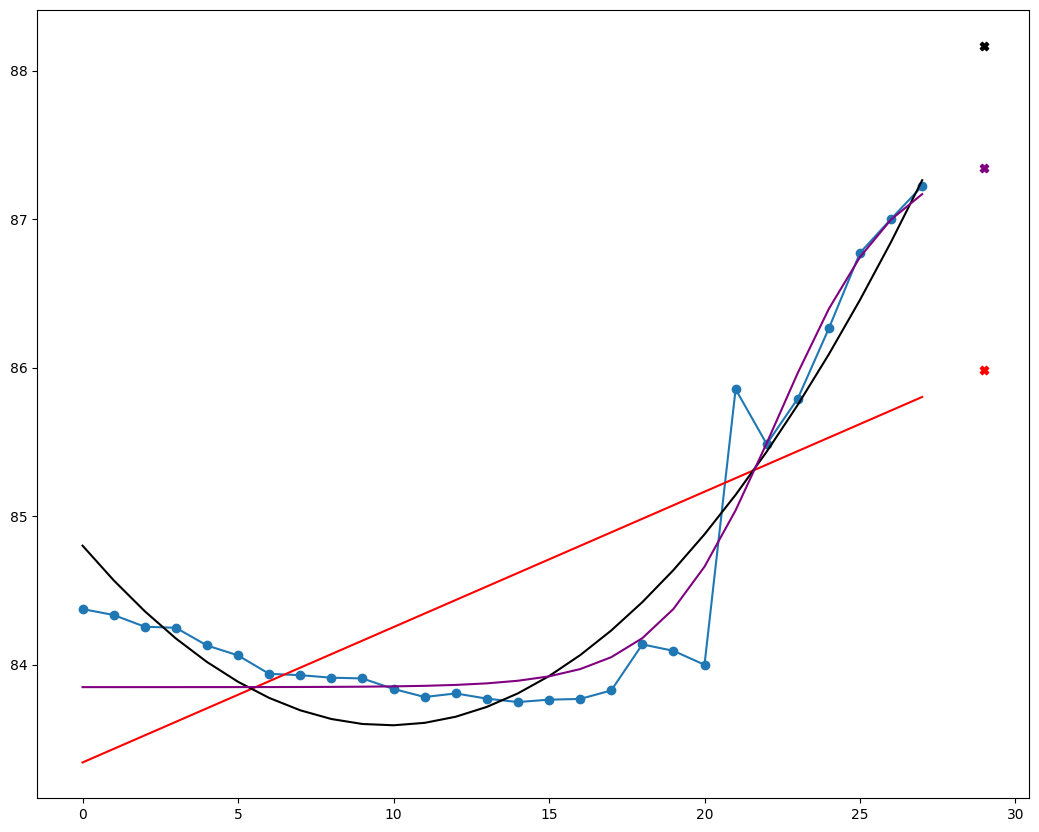

In [44]:
plt.figure(figsize=(12.8, 10.24), dpi=100, facecolor='w', edgecolor='k')
plt.scatter(x,y, label="Original Data")
plt.plot(x,y)
plt.scatter(29,y_pred_lr, color="red", label="Linear Predict 2019 Growth Rate", marker="X")
plt.scatter(29,y_pred_pr, color="black", label="Polynomial Predict 2019 Growth Rate", marker="X")
plt.scatter(29,y_pred_ker, color="purple", label="Keras Predict 2019 Growth Rate", marker="X")
plt.plot(x, y_pred, color="red", label="Linear Regression")
plt.plot(x, y_log, color="black", label="Polynomial Regression")
plt.plot(x, y_pred_k, color="purple", label="Keras")